In [51]:
import numpy as np
import matplotlib.pyplot as plt 
import math

In [52]:
class Izkiewicz:
    def __init__ (self,a,b,c,d,vpeak,t,tau):
        self.a = a
        self.b = b 
        self.c = c
        self.d = d
        self.vpeak = vpeak
        self.t = t
        self.tau = tau
        self.v_arr = np.array([])
        self.u_arr = np.array([])
        
    def __v_current(self,v_last,u_last,I):
        v = v_last + self.tau * ((0.04 * v_last + 5)* v_last + 140 - u_last + I)
        if v >= self.vpeak:
            return self.c
        else:
            return v
        
    def __u_current(self,v_curr,u_last):
        u = u_last + self.tau * self.a *(self.b * v_curr - u_last)
        if v_curr >= self.vpeak:
            return self.d + u
        else:
            return u 
        
    def make_izk(self,I_arr,v_start,u_start):
        self.v_arr = np.array([])
        self.u_arr = np.array([])
        self.v_arr = np.append(self.v_arr,v_start)
        self.u_arr = np.append(self.u_arr,u_start)
        
        for i in range(1,len(I_arr)):
            self.v_arr = np.append(self.v_arr,self.__v_current(self.v_arr[i-1],self.u_arr[i-1],I_arr[i]))
            self.u_arr = np.append(self.u_arr,self.__u_current(self.v_arr[i],self.u_arr[i-1]))
            
        return self.v_arr
    
    
    def show(self,v_to_show):
        plt.plot(v_to_show)
        plt.show()
        

In [74]:
class HODGKIN_HUXLEY:
    def __init__ (self,n,m,h,v,vk,vna,vl,gk,gna,gl,cm,dt):
        self.n =n
        self.m =m
        self.h =h
        self.v_rest =v
        self.vk =vk
        self.vna =vna
        self.vl =vl
        self.gk =gk
        self.gna =gna
        self.gl =gl
        self.cm = cm 
        self.dt=dt
        

    def __count_alfa_n(self,v):
        if v!=10:
            return 0.01*(-v+10)/(np.exp((-v+10)/10) - 1)
        else:
            return 0.01
    def __count_alfa_m(self,v):
        if v!=25:
            return  0.1*(-v+25)/(np.exp((-v+25)/10) - 1 )
        else:
            return 1
    def __count_alfa_h(self,v):
        return 0.07*np.exp(-v/20)
    
    def __count_beta_n(self,v):
        return 0.125*np.exp(-v/80)
    
    def __count_beta_m(self,v):
        return 4*np.exp(-v/18)
    
    def __count_beta_h(self,v):
        return 1/(np.exp((-v+30)/10)+1)
    
    def __count_n(self,n_last,v,step):
        return (self.__count_alfa_n(v)*(1-n_last) - self.__count_beta_n(v)*n_last)*step+n_last
        
            
    def count_v(self,v,I_s):
        v[0] = self.v_rest
        for i in range(1,len(I_s)):
            self.m+=(self.__count_alfa_m(v[i-1])*(1-self.m) - self.__count_beta_m(v[i-1])*self.m)*self.dt
            self.n+=(self.__count_alfa_n(v[i-1])*(1-self.n) - self.__count_beta_n(v[i-1])*self.n)*self.dt
            self.h+=(self.__count_alfa_h(v[i-1])*(1-self.h) - self.__count_beta_h(v[i-1])*self.h)*self.dt
            dv=(1./self.cm)*(I_s[i-1] - self.gna*self.m**3*self.h*(v[i-1]-self.vna) - self.gk*self.n**4*(v[i-1]-self.vk) - self.gl*(v[i-1]-self.vl))*self.dt
            v[i]=v[i-1]+dv
    
        return v
    
    def show(self,v_to_show):
        plt.plot(v_to_show)
        plt.show()
            

In [75]:
izk = Izkiewicz(0.02,0.2,-65,8,30,1000,0.1)

I_arr = np.zeros(1000)
I_arr[500:510] = 50
I_arr[700:710] = 50
temp = izk.make_izk(I_arr,-70,-20)


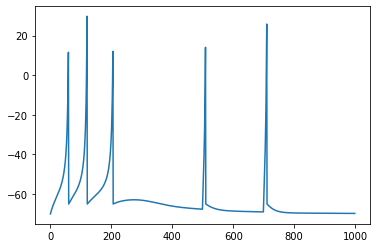

In [76]:
izk.show(temp)

In [77]:
hux = HODGKIN_HUXLEY(0.316,0,0.607,0,-12,120,10.6,36,120,0.3,1,0.025)

In [81]:
dt= 0.025
time=np.arange(0,500,dt)
v=np.zeros(len(time))

v_rest=0
v[0]=v_rest

I_s=np.zeros(len(time))
I_s[1000:2000]=5
I_s[7000:9000]=10
I_s[13000:17000]=40

In [82]:
tempHux = hux.count_v(v,I_s)

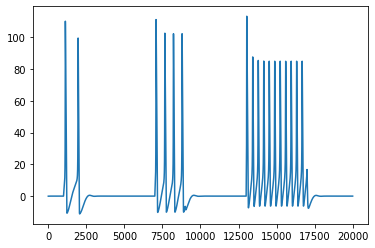

In [83]:
hux.show(tempHux)